In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**<h3>Loading Data</h3>**

In [36]:
df = pd.read_csv('zomato.csv')
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [37]:
df.shape

(51717, 17)

**<h3>Cleaning Data</h3>**

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

  Checking null

In [39]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [40]:
df.drop_duplicates(inplace=True)

Dropping useless columns

In [41]:
## Url, address, reviews_list are not important for analysis
## Dish_liked has more than 50% null values and menu item is also empty

In [42]:
df.drop(columns=['url','address','phone','dish_liked','reviews_list','menu_item'], inplace=True)

In [43]:
## Hence listed in city and location both have same information we have to drop 1 column

In [44]:
df.drop(columns=['listed_in(city)'], inplace=True)

In [45]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500",Pubs and bars
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars


**<h3>Handling & Fixing columns</h3>**

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


Handling Rate

In [47]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [48]:
## Rate column should be in float format so we have to remove '/' from it.
## Also convert New to nan to handle it

In [79]:
def handle_rate(val):
    if val=='NEW' or val=='-':
        return np.nan
    else:
        return val
        

df['rate'] = df['rate'].apply(handle_rate)

In [69]:
df['new_rate'] = df['rate'].str.split('/').str[0]

In [71]:
df['rate'] = df['new_rate']

In [74]:
df.drop(columns=['new_rate'], inplace=True)

In [82]:
df['rate'] = df['rate'].astype('float')

In [81]:
df['rate'].isna().sum()

np.int64(10052)

In [86]:
## Handling nan by replacing with mean
df['rate'].fillna(round(df['rate'].mean(), 1), inplace= True)

C:\Users\Hamdard\AppData\Local\Temp\ipykernel_12480\130851062.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate'].fillna(round(df['rate'].mean(), 1), inplace= True)


In [88]:
df['rate'].isna().sum()

np.int64(0)

Handling Location

In [97]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [98]:
## So there are many values in location so we are making cluster of minor locations 

In [100]:
location_counts = df['location'].value_counts()

location_counts = location_counts[location_counts<300]

location_counts

location
Vasanth Nagar                    295
Jeevan Bhima Nagar               272
Wilson Garden                    246
Bommanahalli                     238
Koramangala 3rd Block            216
Kumaraswamy Layout               195
Thippasandra                     194
Basaveshwara Nagar               191
Nagawara                         187
Seshadripuram                    165
Hennur                           161
Majestic                         155
HBR Layout                       153
Infantry Road                    151
Race Course Road                 139
City Market                      126
Yeshwantpur                      119
Varthur Main Road, Whitefield    117
ITPL Main Road, Whitefield       113
South Bangalore                  107
Hosur Road                       102
Koramangala 2nd Block            102
Kaggadasapura                    101
CV Raman Nagar                    90
RT Nagar                          80
Vijay Nagar                       80
Sanjay Nagar                 

In [101]:
def handle_location(val):
    if val in location_counts:
        return 'others'
    else:
        return val

df['location'] = df['location'].apply(handle_location)

In [102]:
df['location'].value_counts()

location
BTM                      5124
others                   4707
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
Indiranagar              2083
Jayanagar                1926
Marathahalli             1846
Bannerghatta Road        1630
Bellandur                1286
Electronic City          1258
Koramangala 1st Block    1238
Brigade Road             1218
Koramangala 7th Block    1181
Koramangala 6th Block    1156
Sarjapur Road            1065
Ulsoor                   1023
Koramangala 4th Block    1017
MG Road                   918
Banashankari              906
Kalyan Nagar              853
Richmond Road             812
Frazer Town               727
Malleshwaram              725
Basavanagudi              684
Residency Road            675
Banaswadi                 664
Brookefield               658
New BEL Road              649
Kammanahalli              648
Rajajinagar               591
Church Street             569
L

In [103]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,"1,500",Pubs and bars
51713,Vinod Bar And Restaurant,No,No,3.7,0,Whitefield,Bar,Finger Food,600,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.7,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,others,Bar,Finger Food,"2,500",Pubs and bars


Handling RestType

In [105]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [ ]:
## So there are many values so we are making cluster of minors of rest type which are less than 1000

In [108]:
type_counts = df['rest_type'].value_counts()

type_counts = type_counts[type_counts<1000]

def handle_rest_type(val):
    if val in type_counts:
        return 'others'
    else:
        return val
    
df['rest_type'] = df['rest_type'].apply(handle_rest_type)

Handling Cost for 2

In [115]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [ ]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',','')

In [120]:
df.rename(columns={'approx_cost(for two people)':'CostFor2plates','listed_in(type)':'Type'},inplace=True)

In [122]:
df['CostFor2plates'] = df['CostFor2plates'].astype('float')

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            51717 non-null  object 
 1   online_order    51717 non-null  object 
 2   book_table      51717 non-null  object 
 3   rate            51717 non-null  float64
 4   votes           51717 non-null  int64  
 5   location        51696 non-null  object 
 6   rest_type       51490 non-null  object 
 7   cuisines        51672 non-null  object 
 8   CostFor2plates  51371 non-null  float64
 9   Type            51717 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.9+ MB


In [124]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,CostFor2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,others,Continental,1500.0,Pubs and bars
51713,Vinod Bar And Restaurant,No,No,3.7,0,Whitefield,others,Finger Food,600.0,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.7,0,Whitefield,others,Finger Food,2000.0,Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,others,others,Finger Food,2500.0,Pubs and bars


Handling Cusines

In [129]:
cuisine_count = df['cuisines'].value_counts()
cuisine_count = cuisine_count[cuisine_count<100]

def handle_cuisines(val):
    if val in cuisine_count:
        return 'others'
    else:
        return val

df['cuisines'] = df['cuisines'].apply(handle_cuisines)

In [130]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,CostFor2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,others,Continental,1500.0,Pubs and bars
51713,Vinod Bar And Restaurant,No,No,3.7,0,Whitefield,others,Finger Food,600.0,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.7,0,Whitefield,others,Finger Food,2000.0,Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,others,others,Finger Food,2500.0,Pubs and bars


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            51717 non-null  object 
 1   online_order    51717 non-null  object 
 2   book_table      51717 non-null  object 
 3   rate            51717 non-null  float64
 4   votes           51717 non-null  int64  
 5   location        51696 non-null  object 
 6   rest_type       51490 non-null  object 
 7   cuisines        51672 non-null  object 
 8   CostFor2plates  51371 non-null  float64
 9   Type            51717 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.9+ MB


**<h3>Visualization</h3>**

In [135]:
location = df['location'].value_counts()

C:\Users\Hamdard\AppData\Local\Temp\ipykernel_12480\1231160306.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location.index, y = location.values , palette='inferno')


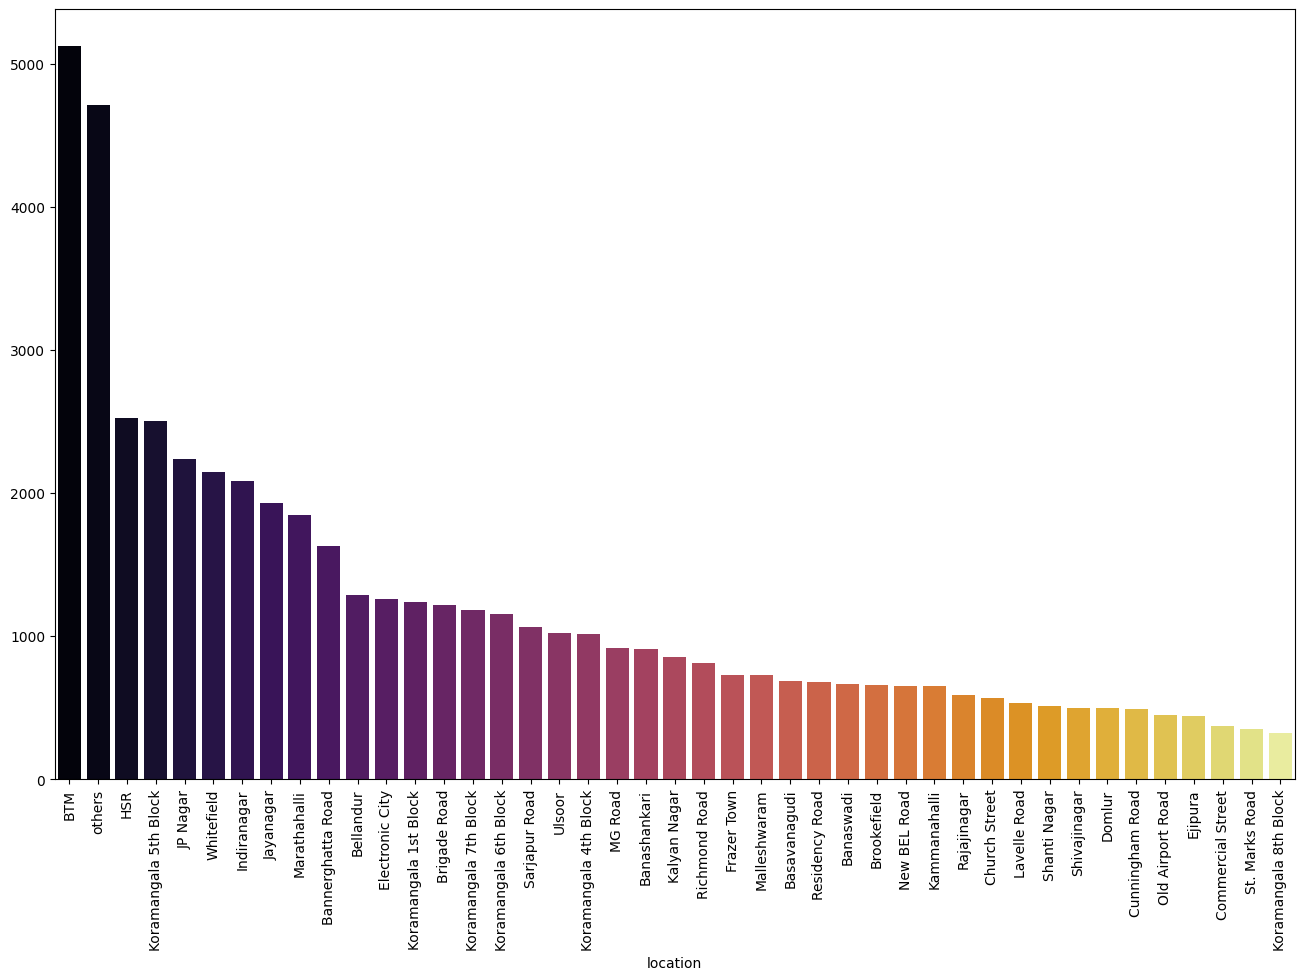

In [138]:
plt.figure(figsize=(16,10))
sns.barplot(x=location.index, y = location.values , palette='inferno')
plt.xticks(rotation=90)
plt.show()

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31861 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            31861 non-null  object 
 1   online_order    31861 non-null  object 
 2   book_table      31861 non-null  object 
 3   rate            31861 non-null  float64
 4   votes           31861 non-null  int64  
 5   location        31847 non-null  object 
 6   rest_type       31729 non-null  object 
 7   cuisines        31829 non-null  object 
 8   CostFor2plates  31669 non-null  float64
 9   Type            31861 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.7+ MB


In [144]:
df.drop_duplicates(inplace=True)

In [145]:
df.shape

(31861, 10)

C:\Users\Hamdard\AppData\Local\Temp\ipykernel_12480\2449574475.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='online_order',y='rate',data=df, palette='Paired')


<Axes: xlabel='online_order', ylabel='rate'>

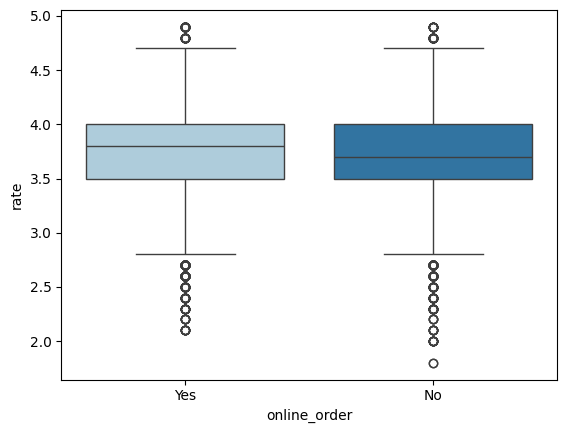

In [148]:
sns.boxplot(x='online_order',y='rate',data=df, palette='Paired')

C:\Users\Hamdard\AppData\Local\Temp\ipykernel_12480\210322828.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='book_table',y='rate',data=df, palette= 'icefire')


<Axes: xlabel='book_table', ylabel='rate'>

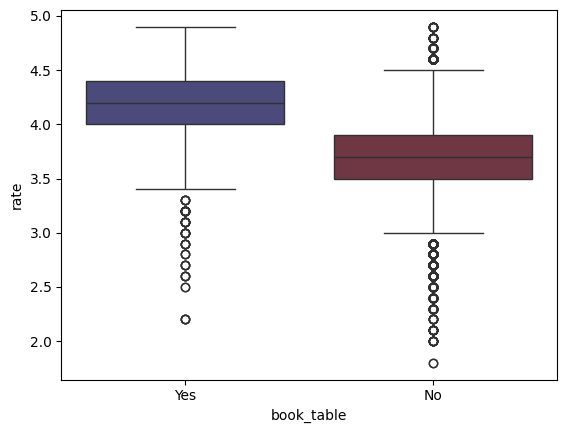

In [151]:
sns.boxplot(x='book_table',y='rate',data=df, palette= 'icefire')

C:\Users\Hamdard\AppData\Local\Temp\ipykernel_12480\2746235290.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='rate', y='votes', data=df, palette='tab10')


<Axes: xlabel='rate', ylabel='votes'>

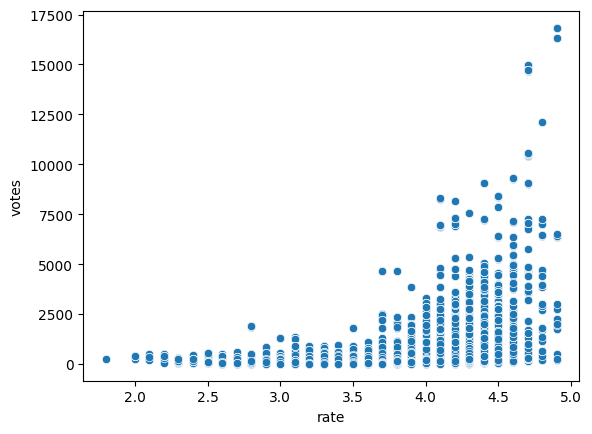

In [154]:
sns.scatterplot(x='rate', y='votes', data=df, palette='tab10')

In [ ]:
## Both are not correlated

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31861 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            31861 non-null  object 
 1   online_order    31861 non-null  object 
 2   book_table      31861 non-null  object 
 3   rate            31861 non-null  float64
 4   votes           31861 non-null  int64  
 5   location        31847 non-null  object 
 6   rest_type       31729 non-null  object 
 7   cuisines        31829 non-null  object 
 8   CostFor2plates  31669 non-null  float64
 9   Type            31861 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.7+ MB


C:\Users\Hamdard\AppData\Local\Temp\ipykernel_12480\540575941.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='book_table',y='rate',data=df,palette='inferno')


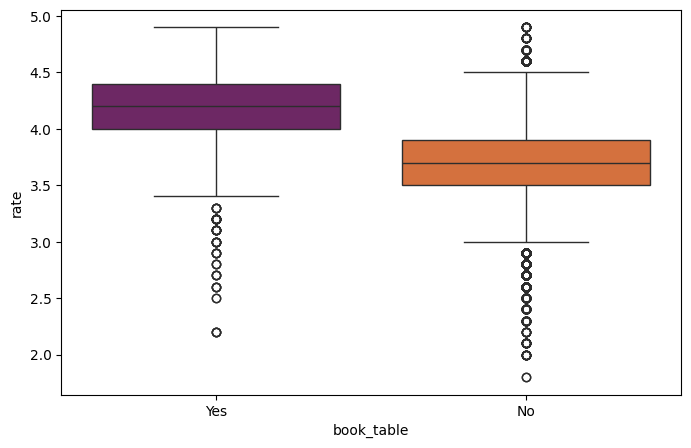

In [157]:
plt.figure(figsize=(8,5))
sns.boxplot(x='book_table',y='rate',data=df,palette='inferno')
plt.show()

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31861 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            31861 non-null  object 
 1   online_order    31861 non-null  object 
 2   book_table      31861 non-null  object 
 3   rate            31861 non-null  float64
 4   votes           31861 non-null  int64  
 5   location        31847 non-null  object 
 6   rest_type       31729 non-null  object 
 7   cuisines        31829 non-null  object 
 8   CostFor2plates  31669 non-null  float64
 9   Type            31861 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.7+ MB
